In [41]:
import matplotlib
from pylab import *
import networkx as nx
import scipy
import random
import numpy as np
import scipy as snp
%matplotlib inline



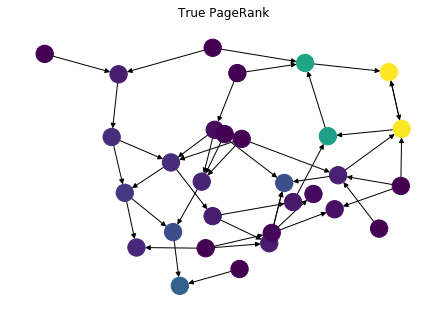

In [42]:
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g), node_color = [int(v*1000) for v in nx.pagerank(g).values()])
plt.title("True PageRank")
plt.show()

In [43]:

def get_pagerank(g, n=10000, alpha=.85):
    
    for n in list(g.nodes):
        g.nodes[n]['rank'] = 0
    cnt = random.choice(list(g.nodes))
    
    for _ in range(10000):
        g.nodes[cnt]['rank'] += 1
        if random.random() < alpha and len(list(g.neighbors(cnt))) > 0:
            cnt = random.choice(list(g.neighbors(cnt)))
        else:
            cnt = random.choice(list(g.nodes))
    
    return {key: value / (n * 1.0) for key, value in nx.get_node_attributes(g, 'rank').items()}

Error from actual Values: 9.020562075079397e-17
Error from actual Values: 9.020562075079397e-17


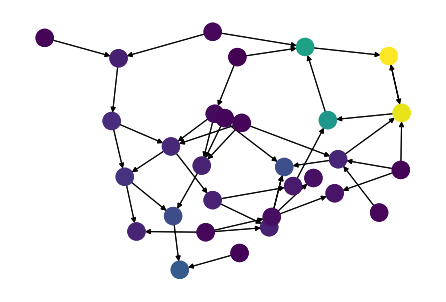

In [44]:
if __name__ == "__main__":

    for i in snp.logspace(0,6,2):
        rank = get_pagerank(g, int(i))
        nx.draw(g, pos=nx.kamada_kawai_layout(g), node_color = [int(v*1000) for v in rank.values()])
        print(f"Error from actual Values: {sum(abs(np.array(list(ranks.values()))) -  np.array(list(nx.pagerank(g).values())))}")